<span>
    <b>Author</b>: Lorenzo Santino 605004 - Giuliano Galloppi 646443<br/>
    <b>Python version:</b>  3.x<br/>
</span>

## **<font color=red> Task 3: Predictive Analysis </font>** <br>

Consider the problem of predicting for each player a label that defines if the player is a high ranked player or a low ranked player (binary task) by exploiting the feature related to the rank of the players.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve

Load the players profile dataset created in the Task 1.

In [2]:
players_profile = pd.read_csv("players_profile.csv", sep = ",", index_col = 0) 
players_profile.shape

(4370, 29)

In [3]:
# Visualize the structure of the dataset

players_profile.head()

,name,sex,ioc,age,ht,hand,rank,df_mean,1stIn_mean,2ndWon_mean,...,Clay_win(%),Grass_win(%),Carpet_win(%),Hard_los(%),Clay_los(%),Grass_los(%),Carpet_los(%),Best_Surface,Worste_Surface,tie_break_rate(%)
id,,,,,,,,,,,,,,,,,,,,,
105935,Duilio Beretta,Male,PER,25,185,R,1428,1,27,12,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,Clay,None,0.0
126502,Luis Diego Chavez Villalpando,Male,ESP,22,185,U,1581,2,43,14,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,Clay,None,0.0
138845,Anthony Jackie Tang,Male,HKG,19,185,U,1519,4,41,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hard,None,100.0
202165,Alberto Lim,Male,PHI,18,185,R,1371,5,37,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hard,None,0.0
134886,Sharmal Dissanayake,Male,SRI,21,185,R,1455,5,46,9,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,Clay,None,0.0


In [4]:
# Descrption of the dataset
players_profile.describe()

,age,ht,rank,df_mean,1stIn_mean,2ndWon_mean,SvGms_mean,bpSaved_mean,bpFaced_mean,tot_games,...,point_on_first_service(%),Hard_win(%),Clay_win(%),Grass_win(%),Carpet_win(%),Hard_los(%),Clay_los(%),Grass_los(%),Carpet_los(%),tie_break_rate(%)
count,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,...,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000
mean,22.745309,180.865446,829.680778,2.866590,41.600915,11.216476,9.949428,3.391304,7.309382,64.346911,...,63.144211,17.270954,14.222902,0.876330,0.491515,35.874863,29.016611,1.367249,0.879263,7.778082
std,4.067510,4.424357,476.690507,0.994747,5.973850,2.569751,1.186425,1.125545,1.632926,84.049684,...,6.096428,17.311815,16.506377,3.226831,2.633705,29.589472,28.567339,6.271068,5.139266,8.586188
min,14.000000,170.000000,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,16.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,177.000000,446.000000,2.000000,41.000000,10.000000,10.000000,3.000000,7.000000,4.000000,...,60.380000,0.000000,0.000000,0.000000,0.000000,13.392500,5.582500,0.000000,0.000000,0.000000
50%,22.000000,177.000000,828.000000,3.000000,43.000000,11.000000,10.000000,3.000000,7.000000,22.000000,...,62.660000,13.330000,8.260000,0.000000,0.000000,29.555000,21.960000,0.000000,0.000000,6.980000
75%,25.000000,185.000000,1171.750000,3.000000,43.000000,12.000000,10.000000,4.000000,8.000000,94.000000,...,66.427500,31.110000,25.000000,0.000000,0.000000,50.000000,42.860000,0.000000,0.000000,12.330000
max,36.000000,198.000000,2257.000000,9.000000,84.000000,29.000000,18.000000,12.000000,18.000000,377.000000,...,100.000000,100.000000,100.000000,66.670000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### **<font color=orange> 3.1 Data Preprocessing </font>** <br>
We are going to explore the supervised binary classification tasks. The supervised training need to to define the labels that will be trained. <br>
In this specific problem, we need to define a binary label that specify if a player is **high ranked** (high label) or **low ranked** (low label).

#### **<font color=violet> 3.1.1 Label Assignement </font>** <br>

In [5]:
players_profile["rank"].median()

828.0

To make the label for each player, we consider the **rank** feature in order to compute a treshold that categorize the high rank class and low rank class, defined as:
- High if the player's rank is less than the treshold
- Low  otherwise 

From the the semantic word, we know that the highster players rank start to 1 and go to increase. <br>
For this reason, we choose the threshold using the *quantile* function at *0.40*.

In [6]:
labels_name = ["High", "Low"]

threshold = 300
#players_profile["label_rank"] = np.where(players_profile["rank"] < threshold, "High", "Low")

In [7]:
#n_low_rank  = players_profile.loc[players_profile["label_rank"] == "Low",  "label_rank"].count()
#n_high_rank = players_profile.loc[players_profile["label_rank"] == "High", "label_rank"].count()

#print("We have {} ({:.2f} %)\t high rank players".format(n_high_rank, n_high_rank / (n_low_rank + n_high_rank) * 100))
#print("We have {} ({:.2f} %)\t low rank players".format(n_low_rank, n_low_rank / (n_low_rank + n_high_rank) * 100))

In [8]:
# label tipo1
quantile_rank = players_profile["rank"].quantile(0.40)
quantile_rank

666.0

In [9]:
threshold = quantile_rank
players_profile["label_rank"] = np.where(players_profile["rank"] < threshold, "High", "Low")

In [10]:
n_low_rank  = players_profile.loc[players_profile["label_rank"] == "Low",  "label_rank"].count()
n_high_rank = players_profile.loc[players_profile["label_rank"] == "High", "label_rank"].count()

print("We have {} ({:.2f} %)\t high rank players".format(n_high_rank, n_high_rank / (n_low_rank + n_high_rank) * 100))
print("We have {} ({:.2f} %)\t low rank players".format(n_low_rank, n_low_rank / (n_low_rank + n_high_rank) * 100))

We have 1746 (39.95 %)	 high rank players
We have 2624 (60.05 %)	 low rank players


#### **<font color=violet> 3.1.2 Discretization of the categorical attributes </font>** <br>

We need to discretize the categorical attributes and then use them for the classification task.

In [11]:
# Helper Function

def discretize_data(dataset, variables):
    for variable in variables:
        #get the unique variable's values
        var = sorted(dataset[variable].unique())
        
        #generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        #add a new colum with the number representation of the variable
        dataset[variable+'_num'] = dataset[variable].map(mapping).astype(int)
    return dataset

We drop the useless columns.

In [12]:
players_profile.drop("name", axis=1, inplace = True)
players_profile.drop("ioc", axis=1, inplace = True)
players_profile.drop("rank", axis=1, inplace = True)
#players_profile.drop("tot_games", axis=1, inplace = True)

In [13]:
attributes = ['sex', 'hand', "Best_Surface", "Worste_Surface"]

players_profile = discretize_data(players_profile, attributes)

In [14]:
# Drop the categorical variables since we don't need them anymore 

players_profile.drop(columns=["sex", 'hand', "Best_Surface", "Worste_Surface"], axis=1,inplace=True)

In [15]:
# The resulting dataset

players_profile.head()

,age,ht,df_mean,1stIn_mean,2ndWon_mean,SvGms_mean,bpSaved_mean,bpFaced_mean,tot_games,winrate,...,Hard_los(%),Clay_los(%),Grass_los(%),Carpet_los(%),tie_break_rate(%),label_rank,sex_num,hand_num,Best_Surface_num,Worste_Surface_num
id,,,,,,,,,,,,,,,,,,,,,
105935,25,185,1,27,12,8,2,2,1.0,100.0,...,0.0,0.0,0.0,0.0,0.0,Low,1,1,1,4
126502,22,185,2,43,14,11,3,4,1.0,100.0,...,0.0,0.0,0.0,0.0,0.0,Low,1,2,1,4
138845,19,185,4,41,22,11,4,7,1.0,100.0,...,0.0,0.0,0.0,0.0,100.0,Low,1,2,3,4
202165,18,185,5,37,15,10,4,6,1.0,100.0,...,0.0,0.0,0.0,0.0,0.0,Low,1,1,3,4
134886,21,185,5,46,9,11,2,7,1.0,100.0,...,0.0,0.0,0.0,0.0,0.0,Low,1,1,1,4


#### **<font color=violet> 3.1.3 Dataset Preparation </font>** <br> 
We need to split the players profile input dataset into a training set and a test set.

In [16]:
from sklearn.model_selection import train_test_split

label = players_profile.pop("label_rank")
train_set, test_set, train_label, test_label = train_test_split(players_profile, label, stratify = label, test_size=0.25)

train_set

,age,ht,df_mean,1stIn_mean,2ndWon_mean,SvGms_mean,bpSaved_mean,bpFaced_mean,tot_games,winrate,...,Carpet_win(%),Hard_los(%),Clay_los(%),Grass_los(%),Carpet_los(%),tie_break_rate(%),sex_num,hand_num,Best_Surface_num,Worste_Surface_num
id,,,,,,,,,,,,,,,,,,,,,
221254,19,177,3,43,10,10,3,7,25.0,40.00,...,0.00,48.00,12.00,0.00,0.00,4.00,0,2,3,3
213533,23,177,3,43,11,10,3,7,144.0,56.25,...,1.39,10.42,30.56,0.00,2.78,11.81,0,2,1,1
215191,18,177,3,43,10,10,3,8,13.0,30.77,...,0.00,15.38,53.85,0.00,0.00,0.00,0,1,1,1
203449,28,177,3,43,11,10,3,7,167.0,55.09,...,0.00,29.34,14.37,0.60,0.60,10.18,0,0,3,3
202239,19,185,1,21,11,7,1,6,2.0,0.00,...,0.00,50.00,50.00,0.00,0.00,0.00,1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221951,22,177,3,43,10,10,4,9,3.0,0.00,...,0.00,100.00,0.00,0.00,0.00,0.00,0,2,4,3
105102,30,185,5,48,9,10,6,10,4.0,25.00,...,0.00,25.00,50.00,0.00,0.00,0.00,1,1,1,1
105668,29,182,3,45,14,12,3,4,72.0,61.11,...,0.00,22.22,13.89,2.78,0.00,29.17,1,1,3,3


### **<font color=orange> 3.2  Classifiers Models </font>** <br>

We perform the predictive analysis comparing the performance of different binary classifcation models and we compare and analyze the results.

#### **<font color=violet> 3.2.1 SVC: Support Vector Classification </font>** <br> 

The SVC model select the **best decision boundary** to separate the data in the hyperplane.

SVM represents the decision boundary using a subset of the training examples, known as the **support vectors**.

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, make_scorer

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

For this model we are going to use a **grid search** for the tuning of the best input hyperparameters.

In [18]:
param_dist = {"kernel": ['rbf', 'sigmoid'], # fondamentale per plottare le regioni di piano
              "C": [0.01, 0.1, 0.5, 1, 10, 100],
              "gamma": ["scale", "auto"], # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              "probability": [True], # Whether to enable probability estimates. 
              "class_weight":['balanced', None]}

#define the number of iters
n_iter_search = 20

#define the model
clf = SVC()

#define the grid search
grid_search = RandomizedSearchCV(clf, 
                            param_distributions=param_dist, 
                            n_iter=n_iter_search, 
                            n_jobs=12, 
                            scoring=make_scorer(accuracy_score), verbose=5)
#run the grid search
grid_search.fit(train_set, train_label)

print('Best setting parameters\n', grid_search.cv_results_['params'][0])
print('\nMean of this setting\n', grid_search.cv_results_['mean_test_score'][0], 
      '\n\nStandard Deviation (std) of this setting\n', grid_search.cv_results_['std_test_score'][0])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 3/5] END C=100, class_weight=balanced, gamma=scale, kernel=sigmoid, probability=True;, score=0.722 total time=   5.4s
[CV 2/5] END C=100, class_weight=balanced, gamma=scale, kernel=sigmoid, probability=True;, score=0.741 total time=   5.4s
[CV 4/5] END C=100, class_weight=balanced, gamma=scale, kernel=sigmoid, probability=True;, score=0.734 total time=   5.1s
[CV 1/5] END C=100, class_weight=balanced, gamma=scale, kernel=sigmoid, probability=True;, score=0.761 total time=   6.2s
[CV 3/5] END C=100, class_weight=None, gamma=scale, kernel=sigmoid, probability=True;, score=0.721 total time=   4.8s
[CV 1/5] END C=100, class_weight=None, gamma=scale, kernel=sigmoid, probability=True;, score=0.767 total time=   6.3s
[CV 2/5] END C=100, class_weight=None, gamma=scale, kernel=sigmoid, probability=True;, score=0.730 total time=   6.1s
[CV 4/5] END C=100, class_weight=None, gamma=scale, kernel=sigmoid, probability=True;, score=0.7

In [19]:
#svm = SVC(kernel='rbf', C=0.5, gamma='scale', probability=True, decision_function_shape='ovo')

In [20]:
#svm.fit(train_set, train_label)

##### Training

In [21]:
train_pred_svm = grid_search.predict(train_set)
train_pred_svm_sigm = grid_search.predict(train_set)

##### Testing

In [22]:
test_pred_svm = grid_search.predict(test_set)
test_pred_svm_sigm = grid_search.predict(test_set)

Evaluation

Model performance on the training set

In [23]:
print ('SVM score: \n')
print(classification_report(train_label, train_pred_svm, target_names=labels_name))

SVM score: 

              precision    recall  f1-score   support

        High       0.84      0.83      0.84      1309
         Low       0.89      0.89      0.89      1968

    accuracy                           0.87      3277
   macro avg       0.86      0.86      0.86      3277
weighted avg       0.87      0.87      0.87      3277



Model performance on the test set

In [24]:
print ('SVM test score: \n')
print(classification_report(test_label, test_pred_svm, target_names=labels_name))


SVM test score: 

              precision    recall  f1-score   support

        High       0.85      0.79      0.82       437
         Low       0.87      0.90      0.89       656

    accuracy                           0.86      1093
   macro avg       0.86      0.85      0.85      1093
weighted avg       0.86      0.86      0.86      1093



/Users/giulio/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


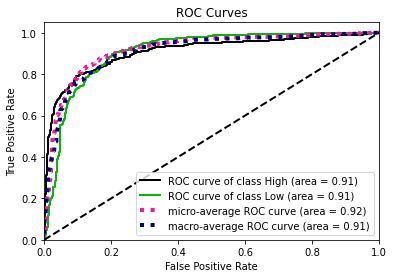

In [25]:
import scikitplot as skplt
import matplotlib.pyplot as plt
test_pred_proba = grid_search.predict_proba(test_set)
skplt.metrics.plot_roc_curve(test_label.values, test_pred_proba)
plt.show()

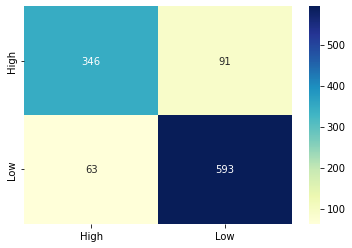

In [26]:
confusion = pd.DataFrame(confusion_matrix(test_label, test_pred_svm, labels=labels_name), 
                         columns=labels_name, index=labels_name)

sns.heatmap(confusion, annot=True, fmt='g', cmap='YlGnBu');

#### **<font color=violet> 3.2.2 Decision Tree </font>** <br> 

In the **Decision Tree** model the leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

In [27]:
from sklearn import tree

In [28]:
dt_max_depth = [2,3,5,6,7,10,12, None]
dt_min_samples_split = [2, 5, 10, 15, 20, 30]
min_samples_leaf = [1, 2, 4, 7, 10, 15]
criterion = ["entropy", "gini"]
splitter = ["best", "random"]
max_features = [None, 2, 3, 4, 5]

dt_param_grid = {
    "max_depth": dt_max_depth,
    "min_samples_split": dt_min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "criterion": criterion,
    "splitter": splitter,
    "max_features": max_features
}

#define the number of iters (random combination to try)
n_iter_search = 500

#define the number of jobs to run in parallel
n_jobs_search = 12

#define the grid search and fit the data
dt_grid = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_distributions=dt_param_grid, 
                            n_iter=n_iter_search,  
                            n_jobs=n_jobs_search,
                            scoring=make_scorer(accuracy_score)).fit(train_set, train_label)

In [29]:
print(dt_grid.best_params_)

{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': None, 'max_depth': 7, 'criterion': 'entropy'}


Training

In [30]:
dt = tree.DecisionTreeClassifier(**dt_grid.best_params_).fit(train_set, train_label)

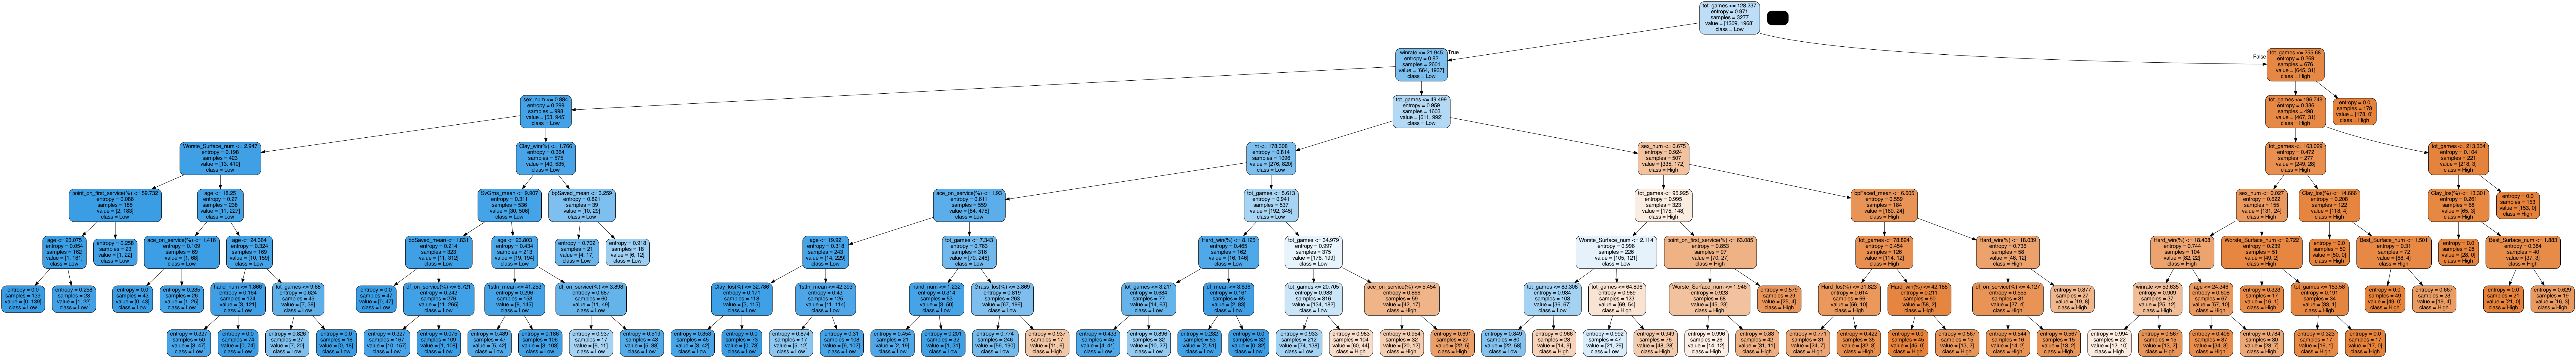

In [31]:
#visualize the actual decision tree obtained 
import pydotplus 
from IPython.display import Image 

dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(train_set.columns),  
                         class_names=labels_name,  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Test

In [32]:
train_pred_dt = dt.predict(train_set)
test_pred_dt = dt.predict(test_set)

Evaluation

Discussing the possibility of overfitting

In [33]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
from sklearn import metrics

print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred_dt))
print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred_dt))
print('Precision train set ', metrics.precision_score(train_label, train_pred_dt, average='weighted'))
print('Recall train set ', metrics.recall_score(train_label, train_pred_dt, average='weighted'))
print('F1 score train set ', metrics.f1_score(train_label, train_pred_dt, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred_dt))

Accuracy train set  0.8642050656087885
Accuracy test set  0.8517840805123513
Precision train set  0.863679633623171
Recall train set  0.8642050656087885
F1 score train set  0.8634938624647693
Support train set  (array([0.84951456, 0.87310142]), array([0.80213904, 0.9054878 ]), array([0.82514735, 0.88899975]), array([1309, 1968]))


##### Model performance on the training set

In [34]:
print(classification_report(train_label, train_pred_dt, target_names=labels_name))

              precision    recall  f1-score   support

        High       0.85      0.80      0.83      1309
         Low       0.87      0.91      0.89      1968

    accuracy                           0.86      3277
   macro avg       0.86      0.85      0.86      3277
weighted avg       0.86      0.86      0.86      3277



##### Model performance on the test set

In [35]:
print(classification_report(test_label, test_pred_dt, target_names=labels_name))

              precision    recall  f1-score   support

        High       0.86      0.75      0.80       437
         Low       0.85      0.92      0.88       656

    accuracy                           0.85      1093
   macro avg       0.85      0.84      0.84      1093
weighted avg       0.85      0.85      0.85      1093



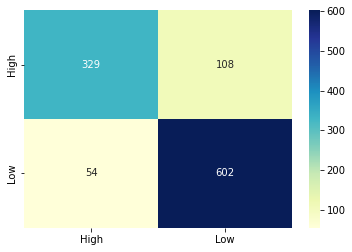

In [36]:
confusion = pd.DataFrame(confusion_matrix(test_label, test_pred_dt, labels=labels_name), 
                         columns=labels_name, index=labels_name)

sns.heatmap(confusion, annot=True, fmt='g', cmap='YlGnBu');

#### **<font color=violet> 3.2.3 Random Forest </font>** <br> 

The **Random Forest** model is a Esemble Method classifier where the output of the random forest is the class selected by most trees.

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
#to find the best set of parameter setting, we can run a grid search
#define the parameters' values you want to try
param_dist = {"max_depth": [2,3,5,6,7,10,12,None],
              "max_features": ["auto", "sqrt", "log2", 1, 5],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4],
              "bootstrap": [True, False],
              "criterion": ["entropy", "gini"]}

#define the number of iters
n_iter_search = 50

#define the model
clf = RandomForestClassifier(n_estimators=30) # The number of trees in the forest

#define the grid search and fit the data
grid_search = RandomizedSearchCV(clf, param_distributions=param_dist, 
                            n_iter=n_iter_search, 
                            n_jobs=12, 
                            scoring=make_scorer(accuracy_score)).fit(train_set, train_label)

Print the best set of hyperparameters for this dataset.

In [39]:
print('Best setting parameters\n', grid_search.cv_results_['params'][0])
print('\nMean of this setting\n', grid_search.cv_results_['mean_test_score'][0], 
      '\n\nStandard Deviation (std) of this setting\n', grid_search.cv_results_['std_test_score'][0])

Best setting parameters
 {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}

Mean of this setting
 0.8519935766151555 

Standard Deviation (std) of this setting
 0.01005990843449625


Evaluation

In [40]:
#prediction on the train test
train_pred_rf = grid_search.predict(train_set)

#prediction on the test test
test_pred_rf = grid_search.predict(test_set)

Model performance on the training set

In [41]:
#compute the performance of the model
print(classification_report(train_label, train_pred_rf, target_names=labels_name))

              precision    recall  f1-score   support

        High       0.96      0.93      0.94      1309
         Low       0.95      0.97      0.96      1968

    accuracy                           0.96      3277
   macro avg       0.96      0.95      0.95      3277
weighted avg       0.96      0.96      0.96      3277



##### Model performance on the test set

In [42]:
#compute the performance of the model
print(classification_report(test_label, test_pred_rf, target_names=labels_name))

              precision    recall  f1-score   support

        High       0.86      0.75      0.80       437
         Low       0.85      0.92      0.88       656

    accuracy                           0.85      1093
   macro avg       0.85      0.84      0.84      1093
weighted avg       0.85      0.85      0.85      1093



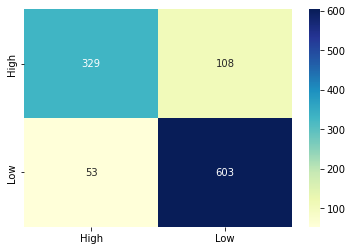

In [43]:
confusion = pd.DataFrame(confusion_matrix(test_label, test_pred_rf, labels=labels_name),

                         columns=labels_name, index=labels_name)



sns.heatmap(confusion, annot=True, fmt='g', cmap='YlGnBu');

#### **<font color=violet> 3.2.4 KNN: K-Nearest Neighbors </font>** <br> 

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('estimator', KNeighborsClassifier())])

tuned_parameters = {'estimator__n_neighbors': (2, 5, 10, 20, 30, 50, 55, 60, 65, 70, 75, 80, 85, 100),
                    'estimator__weights': ('uniform', 'distance')}

grid_search = GridSearchCV(pipeline,
                        param_grid=tuned_parameters,
                        scoring='accuracy',
                        cv=5,  # 5 fold cross validation
                        n_jobs=-1,  # use all processors
                        refit=True,  # refit the best model on the full development set
                        return_train_score=True,
                        verbose=True).fit(train_set, train_label)

print('Best setting parameters\n', grid_search.cv_results_['params'][0])
print('\nMean of this setting\n', grid_search.cv_results_['mean_test_score'][0], 
      '\n\nStandard Deviation (std) of this setting\n', grid_search.cv_results_['std_test_score'][0])

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best setting parameters
 {'estimator__n_neighbors': 2, 'estimator__weights': 'uniform'}

Mean of this setting
 0.7726466207410165 

Standard Deviation (std) of this setting
 0.02867691527324728


##### Training

In [46]:
train_pred_knn = grid_search.predict(train_set)

##### Testing

In [47]:
test_pred_knn = grid_search.predict(test_set)

Evaluation

Model performance on the training set

In [48]:
print ('KNN score: \n')
print(classification_report(train_label, train_pred_knn, target_names=labels_name))

SVM score: 

              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1309
         Low       1.00      1.00      1.00      1968

    accuracy                           1.00      3277
   macro avg       1.00      1.00      1.00      3277
weighted avg       1.00      1.00      1.00      3277



Model performance on the test set

In [74]:
print ('KNN test score: \n')
print(classification_report(test_label, test_pred_knn, target_names=labels_name))


KNN test score: 

              precision    recall  f1-score   support

        High       0.78      0.78      0.78       437
         Low       0.85      0.85      0.85       656

    accuracy                           0.82      1093
   macro avg       0.82      0.82      0.82      1093
weighted avg       0.82      0.82      0.82      1093



/Users/giulio/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


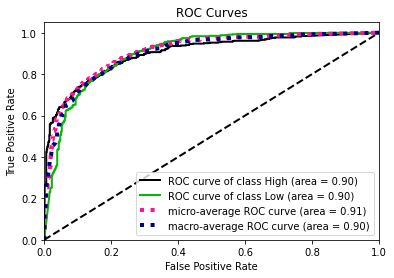

In [50]:
import scikitplot as skplt
import matplotlib.pyplot as plt
test_pred_proba = grid_search.predict_proba(test_set)
skplt.metrics.plot_roc_curve(test_label.values, test_pred_proba)
plt.show()

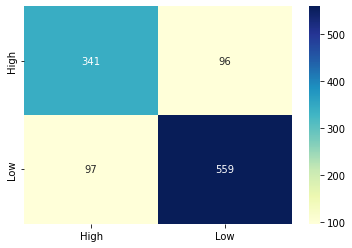

In [51]:
confusion = pd.DataFrame(confusion_matrix(test_label, test_pred_knn, labels=labels_name), 
                         columns=labels_name, index=labels_name)

sns.heatmap(confusion, annot=True, fmt='g', cmap='YlGnBu');

#### **<font color=violet> 3.2.5 Naive Bayes </font>** <br> 

In [52]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_label)

#predict on the test set
test_pred_gnb = gnb.predict(test_set)

#predict on the training set
train_pred_gnb = gnb.predict(train_set)

It can be easily understood from the performance of the model that the results are not optimal. We expected a similar result since the Naive Bayes classifier is a very simple model, perhaps too much simple for a dataset like ours.

##### METRICS: Model performance on the training set

In [53]:
from sklearn import metrics

#evaulate the accuracy on the train set 
#metrics also contains precision, recall, f1 and the support

print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred_gnb))
print('Precision train set ', metrics.precision_score(train_label, train_pred_gnb, average='weighted'))

Accuracy train set  0.7805920048825145
Precision train set  0.813930825898217


##### METRICS: Model performance on the test set

In [54]:
#evaulate the accuracy on the test set
#metrics also contains precision, recall, f1 and the support
print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred_gnb))
print('Precision test set ', metrics.precision_score(test_label, test_pred_gnb, average='weighted'))
print('Recall test set ', metrics.recall_score(test_label, test_pred_gnb, average='weighted'))
print('F1 score test set ', metrics.f1_score(test_label, test_pred_gnb, average='weighted'))
print('Support test set ', metrics.precision_recall_fscore_support(test_label, test_pred_gnb))

Accuracy test set  0.7630375114364135
Precision test set  0.7922150424501581
Recall test set  0.7630375114364135
F1 score test set  0.7652550793643706
Support test set  (array([0.65451389, 0.88394584]), array([0.86270023, 0.69664634]), array([0.74432379, 0.77919864]), array([437, 656]))


In [55]:
print ('SVM score: \n')
print(classification_report(train_label, train_pred_gnb, target_names=labels_name))

SVM score: 

              precision    recall  f1-score   support

        High       0.67      0.90      0.77      1309
         Low       0.91      0.70      0.79      1968

    accuracy                           0.78      3277
   macro avg       0.79      0.80      0.78      3277
weighted avg       0.81      0.78      0.78      3277



Model performance on the test set

In [56]:
print ('SVM test score: \n')
print(classification_report(test_label, test_pred_gnb, target_names=labels_name))


SVM test score: 

              precision    recall  f1-score   support

        High       0.65      0.86      0.74       437
         Low       0.88      0.70      0.78       656

    accuracy                           0.76      1093
   macro avg       0.77      0.78      0.76      1093
weighted avg       0.79      0.76      0.77      1093



/Users/giulio/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


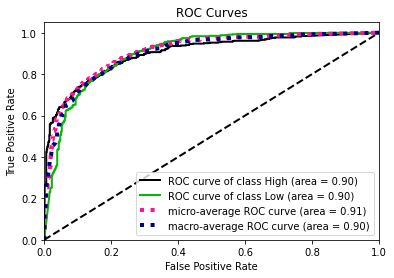

In [57]:
test_pred_proba = grid_search.predict_proba(test_set)
skplt.metrics.plot_roc_curve(test_label.values, test_pred_proba)
plt.show()

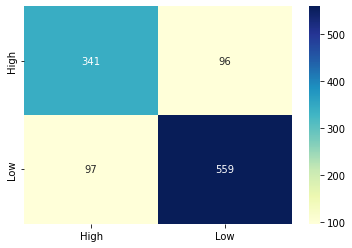

In [58]:
confusion = pd.DataFrame(confusion_matrix(test_label, test_pred_knn, labels=labels_name), 
                         columns=labels_name, index=labels_name)

sns.heatmap(confusion, annot=True, fmt='g', cmap='YlGnBu');

#### **<font color=violet> 3.2.6 Adaboost </font>** <br> 

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(train_set, train_label)

AdaBoostClassifier()

In [60]:
test_pred_ada_clf = ada_clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_ada_clf, 
                            target_names=labels_name))

              precision    recall  f1-score   support

        High       0.83      0.75      0.79       437
         Low       0.84      0.90      0.87       656

    accuracy                           0.84      1093
   macro avg       0.84      0.82      0.83      1093
weighted avg       0.84      0.84      0.84      1093



Adaboost has many parameters, we can select the ***base classifier***, which can be a DecisionTree, a Logistic Regression and so on, we can select the number of estimators and the learning rate.

In [61]:
from sklearn import tree

base = tree.DecisionTreeClassifier(max_depth=5)
ada_clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.1)
ada_clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=200)

In [62]:
test_pred_ada_clf = ada_clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_ada_clf, 
                            target_names=labels_name))

              precision    recall  f1-score   support

        High       0.84      0.74      0.79       437
         Low       0.84      0.91      0.87       656

    accuracy                           0.84      1093
   macro avg       0.84      0.82      0.83      1093
weighted avg       0.84      0.84      0.84      1093



/Users/giulio/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


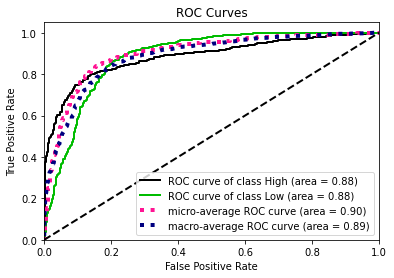

In [63]:
test_pred_ada_clf = ada_clf.predict_proba(test_set)
skplt.metrics.plot_roc_curve(test_label.values, test_pred_ada_clf)
plt.show()

#### **<font color=violet> 3.2.7 NN: Neural Network </font>** <br> 

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('estimator', MLPClassifier())])

tuned_parameters = {'estimator__hidden_layer_sizes': ((50,), (100,), (150,)), 
                    'estimator__activation': ('logistic', 'tanh'), 
                    'estimator__solver': ('lbfgs',)}

grid_search = GridSearchCV(pipeline,
                        param_grid=tuned_parameters,
                        scoring='accuracy',
                        cv=5,  # 5 fold cross validation
                        n_jobs=-1,  # use all processors
                        refit=True,  # refit the best model on the full development set
                        return_train_score=True,
                        verbose=True).fit(train_set, train_label)

print('Best setting parameters\n', grid_search.cv_results_['params'][0])
print('\nMean of this setting\n', grid_search.cv_results_['mean_test_score'][0], 
      '\n\nStandard Deviation (std) of this setting\n', grid_search.cv_results_['std_test_score'][0])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/giulio/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best setting parameters
 {'estimator__activation': 'logistic', 'estimator__hidden_layer_sizes': (50,), 'estimator__solver': 'lbfgs'}

Mean of this setting
 0.8092789983243345 

Standard Deviation (std) of this setting
 0.010652725545487225


##### Training

In [66]:
train_pred_nn = grid_search.best_estimator_.predict(train_set)

##### Testing

In [67]:
test_pred_nn = grid_search.best_estimator_.predict(test_set)

In [68]:
accuracy_score(test_pred_nn, test_label)

0.7968892955169259

Evaluation

Model performance on the training set

In [69]:
print ('NN score: \n')
print(classification_report(train_label, train_pred_nn, target_names=labels_name))

SVM score: 

              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1309
         Low       1.00      1.00      1.00      1968

    accuracy                           1.00      3277
   macro avg       1.00      1.00      1.00      3277
weighted avg       1.00      1.00      1.00      3277



Model performance on the test set

In [70]:
print ('NN test score: \n')
print(classification_report(test_label, test_pred_nn, target_names=labels_name))


SVM test score: 

              precision    recall  f1-score   support

        High       0.76      0.71      0.74       437
         Low       0.82      0.85      0.83       656

    accuracy                           0.80      1093
   macro avg       0.79      0.78      0.79      1093
weighted avg       0.80      0.80      0.80      1093



/Users/giulio/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


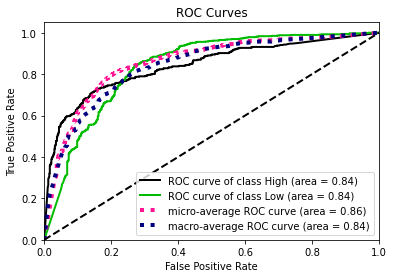

In [71]:
import scikitplot as skplt
import matplotlib.pyplot as plt
test_pred_proba = grid_search.predict_proba(test_set)
skplt.metrics.plot_roc_curve(test_label.values, test_pred_proba)
plt.show()

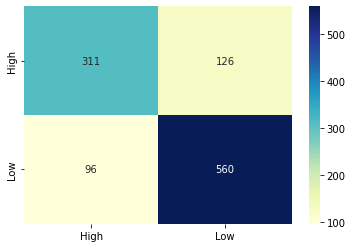

In [72]:
confusion = pd.DataFrame(confusion_matrix(test_label, test_pred_nn, labels=labels_name), 
                         columns=labels_name, index=labels_name)

sns.heatmap(confusion, annot=True, fmt='g', cmap='YlGnBu');

### **<font color=orange> 3.3 Accuracy for each model </font>** <br>
Another way to compare all the models is to see which one has the best accuracy on the predicted labels for the test set.

In [73]:
pred = [test_pred_knn, test_pred_gnb, test_pred_svm, test_pred_nn,  test_pred_dt, test_pred_rf]
model = ['KNN', 'GaussianNB',  'SVM', 'NN', 'Decision Tree', 'Random Forest']

for i in range(len(pred)):
    print('Accuracy of ',model[i],'\t\t', metrics.accuracy_score(test_label, pred[i]))


Accuracy of  KNN 		 0.8234217749313815
Accuracy of  GaussianNB 		 0.7630375114364135
Accuracy of  SVM 		 0.859103385178408
Accuracy of  NN 		 0.7968892955169259
Accuracy of  Decision Tree 		 0.8517840805123513
Accuracy of  Random Forest 		 0.8526989935956084


As previously discovered, **the last four models confirms to be the best three: SVM, Random Forest and Decision Tree.**